<a href="https://colab.research.google.com/github/Yang-star-source/simple_classification_with_neural_network/blob/main/simple_classification_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Classification Problem solved by using neural network

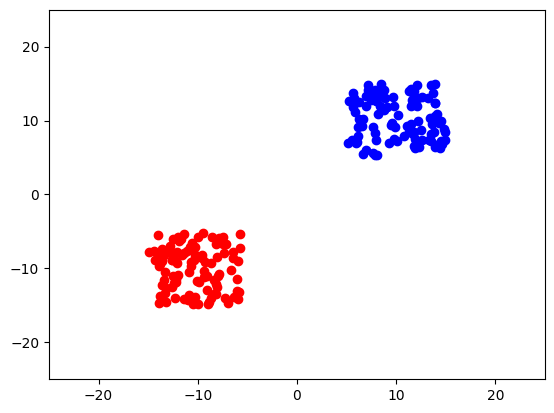

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class_1_x=[]
class_2_x=[]
class_1_y=np.ones(100)
class_2_y=np.zeros(100)
for i in range(100):

  x1=random.uniform(-15,-5)
  y1=random.uniform(-15,-5)

  x2=random.uniform(5,15)
  y2=random.uniform(5,15)

  class_1_x.append([x1,y1])
  class_2_x.append([x2,y2])


class_1_x=np.array(class_1_x)
class_2_x=np.array(class_2_x)

# red is 1 and blue is 0
plt.scatter(class_1_x[:,0],class_1_x[:,1], c='red')
plt.scatter(class_2_x[:,0],class_2_x[:,1], c='blue')

# Set axis limits to make the point easy to see
plt.xlim(-25, 25)
plt.ylim(-25, 25)

X_combined = np.vstack([class_1_x, class_2_x])
y_combined = np.hstack([class_1_y, class_2_y])

plt.show()




Data preprocessing step

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np

X_train, X_test, y_train, y_test=train_test_split(X_combined,y_combined,test_size=0.2,random_state=42)

# Normalize data , good habit , dont let the difference too high
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # fix miu and sigma
X_test=scaler.transform(X_test) # apply the same miu and sigma

X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32).unsqueeze(1)        # first method convert to tensor then adding the [ ] in dim=1
y_test=torch.tensor(y_test.reshape(len(y_test),1),dtype=torch.float32)# second method add [ ] first then only convert to tensor


Start training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # why 2 input ? Because coordinate have 2 input
    self.linear=nn.Linear(2,1)

  def forward(self,X):
    return torch.sigmoid(self.linear(X))

model=LogisticRegression()

# Binary Cross Entropy Loss is critical in binary classification model
loss_fn=nn.BCELoss()
optimizer= optim.SGD(model.parameters(),lr=0.01)

epochs=10000
for epoch in range(epochs):
  y_pred=model(X_train)
  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch %1000==0:
    print(f"epoch:{epoch} , Loss = {loss.item()}")

with torch.no_grad():
  y_pred=model(torch.tensor([-20,-10],dtype=torch.float32))
  print(y_pred)

epoch:0 , Loss = 1.1202685832977295
epoch:1000 , Loss = 0.07265101373195648
epoch:2000 , Loss = 0.03699538856744766
epoch:3000 , Loss = 0.02507469616830349
epoch:4000 , Loss = 0.019073013216257095
epoch:5000 , Loss = 0.01544409990310669
epoch:6000 , Loss = 0.013006364926695824
epoch:7000 , Loss = 0.011252546682953835
epoch:8000 , Loss = 0.009928248822689056
epoch:9000 , Loss = 0.008891727775335312
tensor([1.])


A Generalisation of nn.linear  with multiple input and output

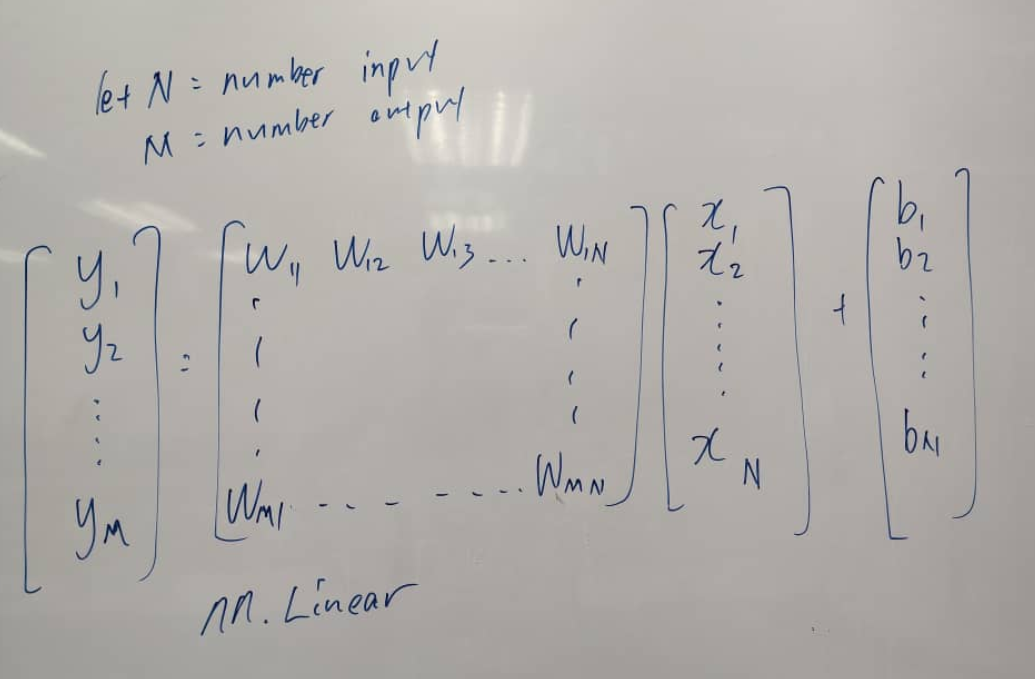

Binary class classification can be done by nn.Linear(2,1) since we use sigmoid ,pattern is if .... then ....

However in MultiClassClassification , we just use nn.linear(2,n=num_class)

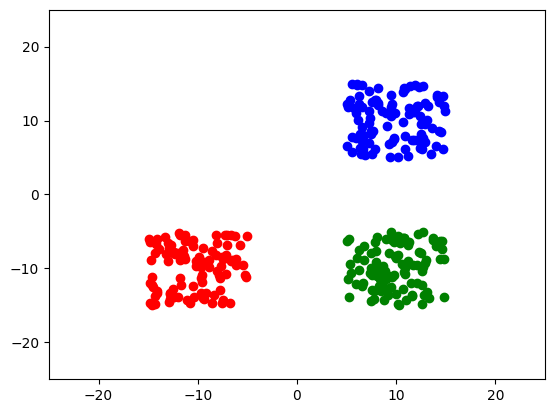

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class_1_x=[]
class_2_x=[]
class_3_x=[]
class_1_y=np.ones(100)
class_2_y=np.zeros(100)
class_3_y=np.ones(100)+np.ones(100)
for i in range(100):

  x1=random.uniform(-15,-5)
  y1=random.uniform(-15,-5)

  x2=random.uniform(5,15)
  y2=random.uniform(5,15)

  x3=random.uniform(5,15)
  y3=random.uniform(-15,-5)

  class_1_x.append([x1,y1])
  class_2_x.append([x2,y2])
  class_3_x.append([x3,y3])


class_1_x=np.array(class_1_x)
class_2_x=np.array(class_2_x)
class_3_x=np.array(class_3_x)

# red is 1 , blue is 0 and green is 2
plt.scatter(class_1_x[:,0],class_1_x[:,1], c='red')
plt.scatter(class_2_x[:,0],class_2_x[:,1], c='blue')
plt.scatter(class_3_x[:,0],class_3_x[:,1], c='green')

# Set axis limits to make the point easy to see
plt.xlim(-25, 25)
plt.ylim(-25, 25)

X_combined = np.vstack([class_1_x, class_2_x,class_3_x])
y_combined = np.hstack([class_1_y, class_2_y,class_3_y])

plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch

X_train,X_test,y_train,y_test=train_test_split(X_combined,y_combined,test_size=0.2,random_state=42,shuffle=True)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.long)
y_test=torch.tensor(y_test,dtype=torch.long)

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam

class MultiClassLogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(2,3)

  def forward(self,X):
    return self.linear(X)

model=MultiClassLogisticRegression()
loss_fn=nn.CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.01)

epochs =2000

for epoch in range(epochs):
  y_pred=model(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 ==0:
    print(f"{epoch} :  Loss = {loss.item()}")

with torch.no_grad():
  # the shape of training data should be same as testing data
  y_pred=model(torch.tensor([[20,-10],[20,-11]],dtype=torch.float32))
  print(y_pred)
  print(y_pred.shape)

  # need to compare the value , so set dim=1 based on y_pred.shape
  prob=torch.softmax(y_pred,dim=1)      # softmax=probabilities unlike sigmoid 0,1
  print(prob)
  print(prob.shape)
  y_pred_class=torch.argmax(prob,dim=1) # argmax give the idx of class which equal class we defined
  print(y_pred_class)


0 :  Loss = 2.003016948699951
100 :  Loss = 0.46792638301849365
200 :  Loss = 0.20288510620594025
300 :  Loss = 0.11994095146656036
400 :  Loss = 0.08209936320781708
500 :  Loss = 0.06099461019039154
600 :  Loss = 0.04772407189011574
700 :  Loss = 0.038693565875291824
800 :  Loss = 0.03219551220536232
900 :  Loss = 0.027321454137563705
1000 :  Loss = 0.023546399548649788
1100 :  Loss = 0.020546969026327133
1200 :  Loss = 0.01811380870640278
1300 :  Loss = 0.016105690971016884
1400 :  Loss = 0.014424117282032967
1500 :  Loss = 0.012998411431908607
1600 :  Loss = 0.011776607483625412
1700 :  Loss = 0.010719734244048595
1800 :  Loss = 0.00979797076433897
1900 :  Loss = 0.008988202549517155
tensor([[  8.2516, -34.1758, 127.7615],
        [  5.4571, -32.6707, 131.2469]])
torch.Size([2, 3])
tensor([[0., 0., 1.],
        [0., 0., 1.]])
torch.Size([2, 3])
tensor([2, 2])
